# Basketball Players

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_score

sns.set_style("whitegrid")

In [2]:
data = pd.read_csv("./data/bball.csv")
data.pos = pd.Categorical(data.pos)
data.head()

,bioID,useFirst,lastName,pos,height,weight,college,hsState,race,GP,...,steals,blocks,turnovers,PF,fgAttempted,fgMade,ftAttempted,ftMade,threeAttempted,threeMade
0,abdelal01,Alaa,Abdelnaby,F-C,82.0,240,Duke,NJ,B,256,...,0.2773,0.2734,0.9648,1.8906,4.8281,2.4219,1.2539,0.8789,0.0117,0.0000
1,abdulma02,Mahmoud,Abdul-Rauf,G,73.0,162,Louisiana State,MS,B,586,...,0.8311,0.0785,1.6433,1.8874,13.5546,5.9966,1.9812,1.7935,2.2850,0.8089
2,abdulta01,Tariq,Abdul-Wahad,G-F,78.0,223,San Jose State,NaN,B,236,...,0.7797,0.3517,1.3093,2.0551,7.3136,3.0508,2.2415,1.5763,0.3220,0.0763
3,abdursh01,Shareef,Abdur-Rahim,F,81.0,225,California,GA,B,830,...,0.9880,0.7687,2.5711,2.8000,13.8735,6.5470,5.9554,4.8265,0.6253,0.1855
4,acresma01,Mark,Acres,F-C,83.0,220,Oral Roberts,CA,W,154,...,0.3442,0.2987,0.5714,2.5455,2.6883,1.3831,1.1948,0.8312,0.0519,0.0195


In [3]:
stats = data.iloc[:, [4, 5]+[i for i in range(10, data.shape[1])]]
stats.head()

,height,weight,minutes,points,oRebounds,dRebounds,assists,steals,blocks,turnovers,PF,fgAttempted,fgMade,ftAttempted,ftMade,threeAttempted,threeMade
0,82.0,240,12.5000,5.7227,1.1055,2.1992,0.3320,0.2773,0.2734,0.9648,1.8906,4.8281,2.4219,1.2539,0.8789,0.0117,0.0000
1,73.0,162,26.6689,14.5956,0.3737,1.4812,3.5478,0.8311,0.0785,1.6433,1.8874,13.5546,5.9966,1.9812,1.7935,2.2850,0.8089
2,78.0,223,20.3686,7.7542,1.2119,2.0763,1.1271,0.7797,0.3517,1.3093,2.0551,7.3136,3.0508,2.2415,1.5763,0.3220,0.0763
3,81.0,225,34.7928,18.1060,2.2518,5.2651,2.5410,0.9880,0.7687,2.5711,2.8000,13.8735,6.5470,5.9554,4.8265,0.6253,0.1855
4,83.0,220,16.2857,3.6169,1.7078,2.6948,0.3377,0.3442,0.2987,0.5714,2.5455,2.6883,1.3831,1.1948,0.8312,0.0519,0.0195


This code extracts the data for the guard position (G).

In [4]:
scaler = StandardScaler()
stats_normalized = scaler.fit_transform(stats)
pos_stats = stats_normalized[data.pos=='G', :]

In [5]:
Z = hierarchy.linkage(pos_stats, method='ward')

labels_2 = hierarchy.fcluster(Z, criterion='maxclust', t=2)
labels_3 = hierarchy.fcluster(Z, criterion='maxclust', t=3)

This code visualizes the clusters.

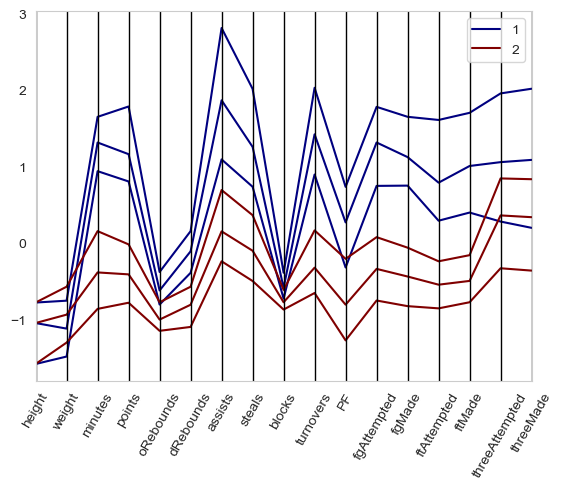

In [6]:
a = pd.DataFrame()
aux = pd.DataFrame(pos_stats)
aux['labels'] = labels_2

for i in [0.25, 0.5, 0.75]:
    a = pd.concat([a, aux.groupby(by='labels').quantile(i).reset_index()])

plt.figure()
pd.plotting.parallel_coordinates(a, "labels", colormap='jet')
plt.xticks(ticks=range(stats.shape[1]), labels=stats.columns, rotation=60)
plt.show()

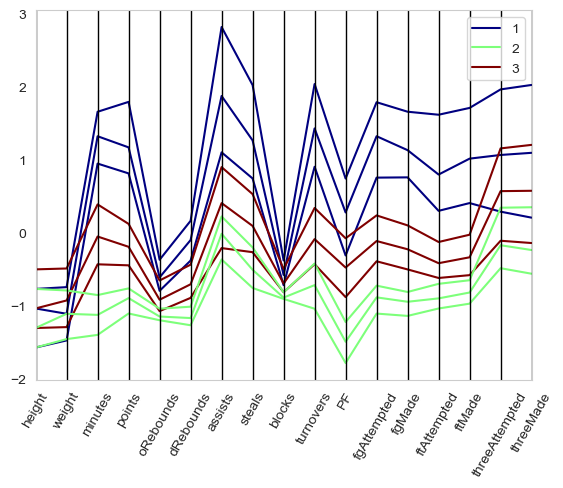

In [7]:
a = pd.DataFrame()
aux = pd.DataFrame(pos_stats)
aux['labels'] = labels_3

for i in [0.25, 0.5, 0.75]:
    a = pd.concat([a, aux.groupby(by='labels').quantile(i).reset_index()])

plt.figure()
pd.plotting.parallel_coordinates(a, "labels", colormap='jet')
plt.xticks(ticks=range(stats.shape[1]), labels=stats.columns, rotation=60)
plt.show()

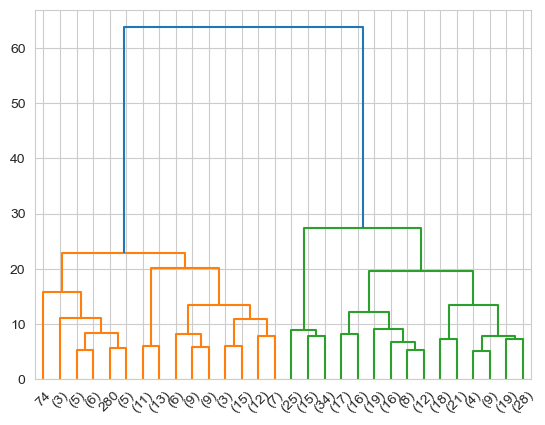

In [8]:
hierarchy.dendrogram(Z, truncate_mode='lastp', p=30);

In [9]:
silhouette_scores = {}
for n_cluster in range(2, 9):
    Z = hierarchy.linkage(pos_stats, method='ward')
    cluster_labels = hierarchy.fcluster(Z, criterion='maxclust', t=n_cluster)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(pos_stats, cluster_labels)
    silhouette_scores[n_cluster] = silhouette_avg

In [10]:
print("Silhouette evaluation:", silhouette_scores)
print("Optimal number of clusters:", max(silhouette_scores, key=silhouette_scores.get))

Silhouette evaluation: {2: 0.3964672689799556, 3: 0.1808095951789755, 4: 0.16665075239592417, 5: 0.15126341648066857, 6: 0.15075433830896562, 7: 0.1526070156005731, 8: 0.15253262480547408}
Optimal number of clusters: 2
